In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew
from scipy.stats import norm,kurtosis
import pandas as pd
import numpy as np

In [2]:
da=xr.open_dataset("/vftmp/Olivia.Mcredmond/data/model_timeseries_odiv2.nc",decode_times=True)
ds=xr.open_dataset("/vftmp/Olivia.Mcredmond/data/model_timeseries_odiv181.nc",decode_times=True)
obs_sandyhook= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/Sandy_hook.cdf",decode_times=True)
obs_seattle= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/Seattle.cdf",decode_times=True)
obs_wellington= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/Wellington.cdf",decode_times=True)
obs_hiroshima= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/hiroshima.cdf",decode_times=True)

In [185]:
ds.SEATTLE.time

<xarray.DataArray 'time' (time: 21915)> Size: 175kB
array([cftime.DatetimeJulian(1958, 1, 1, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1958, 1, 2, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(1958, 1, 3, 12, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeJulian(2017, 12, 29, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2017, 12, 30, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2017, 12, 31, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 175kB 1958-01-01 12:00:00 ... 2017-12-31 12:00:00
Attributes:
    long_name:       time
    cartesian_axis:  T
    calendar_type:   JULIAN
    bounds:          time_bnds

In [188]:
time=np.array(ds.SEATTLE.time)
len(time)

21915

In [ ]:
Seattle181['sealevel']=pd.DataFrame(ds.SEATTLE-ds.SEATTLE.mean())
Seattle181.set_index(time)

time=np.array(da.SEATTLE.time)
Seattle2['sealevel']=pd.DataFrame(da.SEATTLE-da.SEATTLE.mean())
Seattle2.set_index(time)

time=np.array(obs_seattle.datetime)
Seattleobs['sealevel']=pd.DataFrame(obs_seattle.sealevel_tr)
Seattleobs.set_index(time)

,0,sealevel
1899-01-01,0.164259,0.164259
1899-01-02,0.258698,0.258698
1899-01-03,0.080886,0.080886
1899-01-04,-0.096683,-0.096683
1899-01-05,-0.104989,-0.104989
...,...,...
2021-08-27,-0.025069,-0.025069
2021-08-28,-0.042527,-0.042527
2021-08-29,-0.016656,-0.016656
2021-08-30,0.005738,0.005738


                         0  sealevel
(-0.661, -0.646]  0.000022  0.000022
(-0.546, -0.532]  0.000022  0.000022
(-0.518, -0.504]  0.000022  0.000022
(-0.419, -0.404]  0.000022  0.000022
(-0.376, -0.362]  0.000022  0.000022
...                    ...       ...
(0.675, 0.689]    0.000022  0.000022
(0.689, 0.703]    0.000022  0.000022
(0.703, 0.717]    0.000022  0.000022
(0.732, 0.746]    0.000022  0.000022
(0.746, 0.76]     0.000022  0.000022

[81 rows x 2 columns]

 1.0

 0           1.0
sealevel    1.0
dtype: float64

 0.9987054438318861


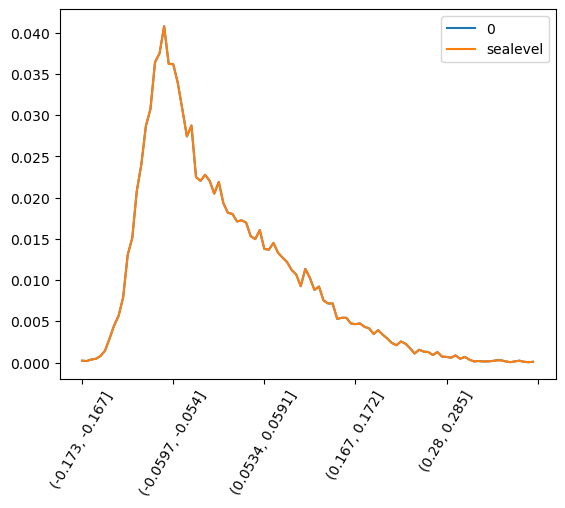

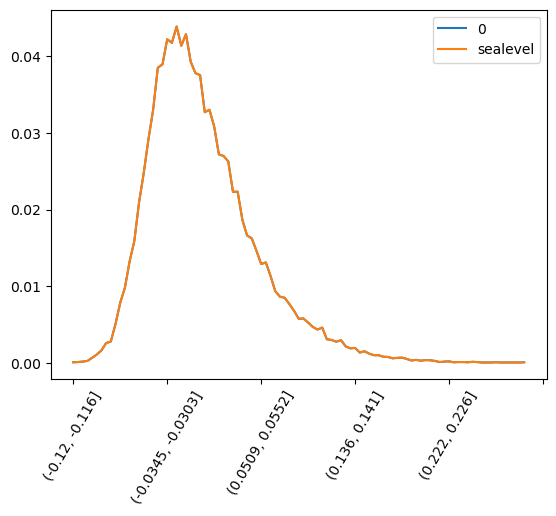

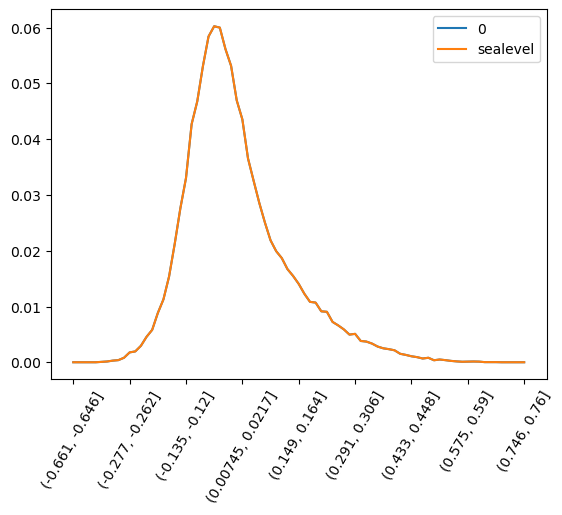

In [105]:
bins=pd.cut(Seattle181['sealevel'],bins=100)
hist181=(Seattle181.groupby(np.array(bins)).count())/len(Seattle181)
bins=pd.cut(Seattle2['sealevel'],bins=100)
hist2=(Seattle2.groupby(np.array(bins)).count())/len(Seattle2)
bins=pd.cut(Seattleobs['sealevel'],bins=100)
histobs=(Seattleobs.groupby(np.array(bins)).count())/len(Seattleobs)

print(histobs)

hist181.plot()
plt.xticks(rotation=60)
hist2.plot()
plt.xticks(rotation=60)
histobs.plot()
plt.xticks(rotation=60)

print('\n',hist181.sealevel.sum())
print('\n',hist2.sum())
print('\n',histobs.sealevel.sum())

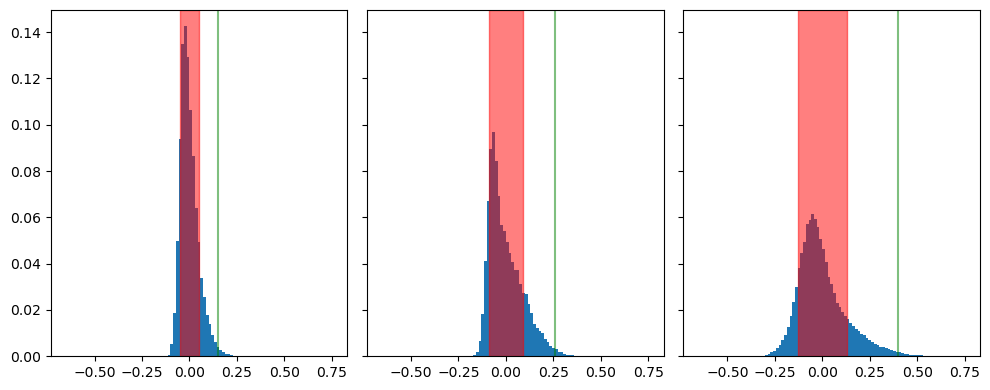

In [184]:
#count,bins1=np.histogram(obs_seattle.sealevel_tr, bins=100, range=[-0.5,0.75],weights=1/len(obs_seattle.sealevel_tr) * np.ones(len(obs_seattle.sealevel_tr)))
bins=np.linspace(np.float64(obs_seattle.sealevel_tr.min()),np.float64(obs_seattle.sealevel_tr.max()), 100)

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, tight_layout=True, figsize=(10,4))

axs[0].hist(da.SEATTLE-da.SEATTLE.mean(), bins=bins, weights=1/len(da.SEATTLE) * np.ones(len(da.SEATTLE)))
axs[0].axvspan(-1*da.SEATTLE.std(),da.SEATTLE.std(), alpha=0.5, color='red')
axs[0].axvline(da.SEATTLE.quantile(0.99)-da.SEATTLE.mean(), alpha=0.5, color='green')

axs[1].hist(ds.SEATTLE-ds.SEATTLE.mean(), bins=bins, weights=1/len(ds.SEATTLE) * np.ones(len(ds.SEATTLE)))
axs[1].axvspan(-1*ds.SEATTLE.std(),ds.SEATTLE.std(), alpha=0.5, color='red')
axs[1].axvline(ds.SEATTLE.quantile(0.99)-ds.SEATTLE.mean(), alpha=0.5, color='green')

axs[2].hist(obs_seattle.sealevel_tr, bins=bins, weights=1/len(obs_seattle.sealevel_tr) * np.ones(len(obs_seattle.sealevel_tr)))
axs[2].axvspan(-1*obs_seattle.sealevel_tr.std(),obs_seattle.sealevel_tr.std(), alpha=0.5, color='red')
axs[2].axvline(obs_seattle.sealevel_tr.quantile(0.99)-obs_seattle.sealevel_tr.mean(), alpha=0.5, color='green')

plt.show()

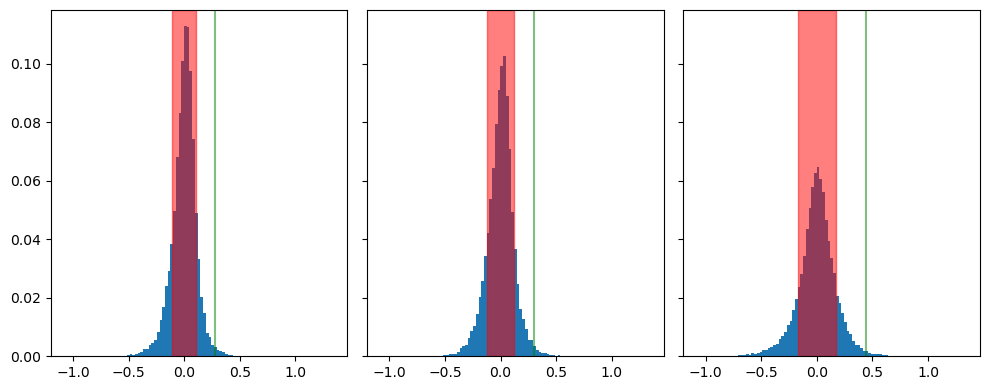

In [183]:
bins=np.linspace(np.float64(obs_sandyhook.sealevel_tr.min()),np.float64(obs_sandyhook.sealevel_tr.max()), 100)

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, tight_layout=True, figsize=(10,4))

axs[0].hist(da.SANDY_HOOK-da.SANDY_HOOK.mean(), bins=bins, weights=1/len(da.SANDY_HOOK) * np.ones(len(da.SANDY_HOOK)))
axs[0].axvspan(-1*da.SANDY_HOOK.std(),da.SANDY_HOOK.std(), alpha=0.5, color='red')
axs[0].axvline(da.SANDY_HOOK.quantile(0.99)-da.SANDY_HOOK.mean(), alpha=0.5, color='green')

axs[1].hist(ds.SANDY_HOOK-ds.SANDY_HOOK.mean(), bins=bins, weights=1/len(ds.SANDY_HOOK) * np.ones(len(ds.SANDY_HOOK)))
axs[1].axvspan(-1*ds.SANDY_HOOK.std(),ds.SANDY_HOOK.std(), alpha=0.5, color='red')
axs[1].axvline(ds.SANDY_HOOK.quantile(0.99)-ds.SANDY_HOOK.mean(), alpha=0.5, color='green')

axs[2].hist(obs_sandyhook.sealevel_tr, bins=bins, weights=1/len(obs_sandyhook.sealevel_tr) * np.ones(len(obs_sandyhook.sealevel_tr)))
axs[2].axvspan(-1*obs_sandyhook.sealevel_tr.std(),obs_sandyhook.sealevel_tr.std(), alpha=0.5, color='red')
axs[2].axvline(obs_sandyhook.sealevel_tr.quantile(0.99)-obs_sandyhook.sealevel_tr.mean(), alpha=0.5, color='green')

plt.show()

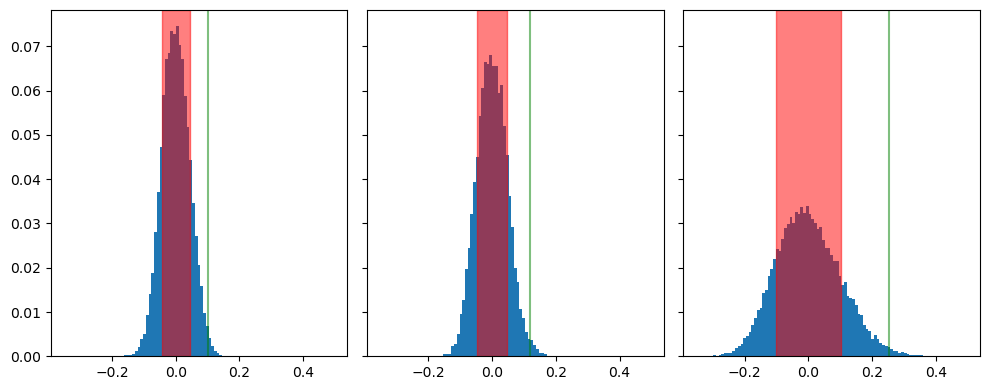

In [182]:
bins=np.linspace(np.float64(obs_wellington.sealevel_tr.min()),np.float64(obs_wellington.sealevel_tr.max()), 100)

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, tight_layout=True, figsize=(10,4))

axs[0].hist(da.WELLINGTON_HARBOUR-da.WELLINGTON_HARBOUR.mean(), bins=bins, weights=1/len(da.WELLINGTON_HARBOUR) * np.ones(len(da.WELLINGTON_HARBOUR)))
axs[0].axvspan(-1*da.WELLINGTON_HARBOUR.std(),da.WELLINGTON_HARBOUR.std(), alpha=0.5, color='red')
axs[0].axvline(da.WELLINGTON_HARBOUR.quantile(0.99)-da.WELLINGTON_HARBOUR.mean(), alpha=0.5, color='green')

axs[1].hist(ds.WELLINGTON_HARBOUR-ds.WELLINGTON_HARBOUR.mean(), bins=bins, weights=1/len(ds.WELLINGTON_HARBOUR) * np.ones(len(ds.WELLINGTON_HARBOUR)))
axs[1].axvspan(-1*ds.WELLINGTON_HARBOUR.std(),ds.WELLINGTON_HARBOUR.std(), alpha=0.5, color='red')
axs[1].axvline(ds.WELLINGTON_HARBOUR.quantile(0.99)-ds.WELLINGTON_HARBOUR.mean(), alpha=0.5, color='green')

axs[2].hist(obs_wellington.sealevel_tr, bins=bins, weights=1/len(obs_wellington.sealevel_tr) * np.ones(len(obs_wellington.sealevel_tr)))
axs[2].axvspan(-1*obs_wellington.sealevel_tr.std(),obs_wellington.sealevel_tr.std(), alpha=0.5, color='red')
axs[2].axvline(obs_wellington.sealevel_tr.quantile(0.99)-obs_wellington.sealevel_tr.mean(), alpha=0.5, color='green')

plt.show()